In [70]:
import numpy as np
import pandas as pd
ctg = pd.read_csv('ctg.csv', sep=';')

In [71]:
ctg_pd = pd.DataFrame(ctg)
ctg_pd['target']=ctg.NSP
#ctg_pd.head()
ctg.isnull()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2126,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2127,True,True,True,True,True,True,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True


In [72]:
ctg.dropna(inplace=True)
ctg.isnull()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
ctg_pd = pd.DataFrame(ctg)
ctg_pd['target']=ctg.NSP

In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#from sklearn.feature_selection import SequentialFeatureSelector

seed_num = 10
y = ctg_pd['target'].values
X = ctg_pd[['LB','AC','FM','UC','ASTV','MSTV','ALTV','MLTV','DL','DS','DP','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','CLASS']]

X = VarianceThreshold(threshold=3).fit_transform(X)
#X = SelectKBest(chi2, k=2).fit_transform(X, y)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed_num) 
print(X_train.shape)
print(X_test.shape)
print(y.shape)

(1700, 17)
(426, 17)
(2126,)


In [76]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, recall_score, precision_score
y_pred = model_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

0.9835680751173709
[[334   2   0]
 [  2  58   1]
 [  0   2  27]]
0.9835680751173709
0.9835680751173709
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       336
         2.0       0.94      0.95      0.94        61
         3.0       0.96      0.93      0.95        29

    accuracy                           0.98       426
   macro avg       0.96      0.96      0.96       426
weighted avg       0.98      0.98      0.98       426



In [77]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='gini', random_state=0)
model_dt.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, recall_score, precision_score
y_pred = model_dt.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

0.9812206572769953
[[332   4   0]
 [  4  57   0]
 [  0   0  29]]
0.9812206572769953
0.9812206572769953
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       336
         2.0       0.93      0.93      0.93        61
         3.0       1.00      1.00      1.00        29

    accuracy                           0.98       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426



In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed_num)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed_num)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1360, 17)
(340, 17)
(426, 17)


In [79]:
scores = []
max_score = 0
best_k = 0
for k in range(1,20):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    score = model_knn.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_k = k
    scores.append(score)
print(best_k)

5


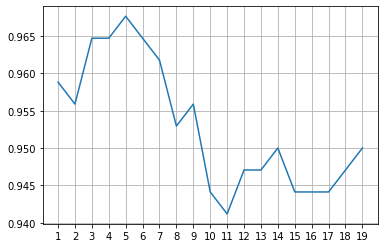

In [80]:
from matplotlib import pyplot as plt
plt.plot(np.arange(1,20), scores)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()

In [81]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='micro'))
print(classification_report(y_test, y_pred))

0.9788732394366197
[[334   2   0]
 [  2  57   2]
 [  0   3  26]]
0.9788732394366197
0.9788732394366197
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       336
         2.0       0.92      0.93      0.93        61
         3.0       0.93      0.90      0.91        29

    accuracy                           0.98       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.98      0.98      0.98       426

